# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#9c7606; font-size:140%; text-align:left;padding: 10px; border-bottom: 2px solid #f79a05"> Import Libraries</p>

In [1]:
import numpy as np
import pandas as pd
import cv2

from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

import warnings

warnings.simplefilter('ignore')
print("o-k")

o-k


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#9c7606; font-size:140%; text-align:left;padding: 10px; border-bottom: 2px solid #f79a05"> Load data</p>

In [4]:
#df = pd.read_csv('../input/self-driving-cars/labels_train.csv')
#df = pd.read_csv(alincijov_self_driving_cars_path+'/labels_train.csv')
df = pd.read_csv("./data/labels_train.csv")
df.head()

,frame,xmin,xmax,ymin,ymax,class_id
0,1478019952686311006.jpg,237,251,143,155,1
1,1478019952686311006.jpg,437,454,120,186,3
2,1478019953180167674.jpg,218,231,146,158,1
3,1478019953689774621.jpg,171,182,141,154,2
4,1478019953689774621.jpg,179,191,144,155,1


In [5]:
classes = df.class_id.unique()
print(classes)

[1 3 2 5 4]


In [6]:
labels = { 1:'car', 2:'truck', 3:'person', 4:'bicycle', 5:'traffic light'}

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#9c7606; font-size:140%; text-align:left;padding: 10px; border-bottom: 2px solid #f79a05"> Show some labeled images</p>

In [7]:
# Get path images and boxes (x,y) for each class_id
boxes = {}
images = {}

#base_path = '../input/self-driving-cars/images/'
base_path = "data/images/"

for class_id in classes:
    first_row = df[df['class_id'] == class_id].iloc[0]

    images[class_id] = cv2.imread(base_path + first_row['frame'])
    boxes[class_id] = [first_row['xmin'],first_row['xmax'],first_row['ymin'],first_row['ymax']]
print('ok')

ok


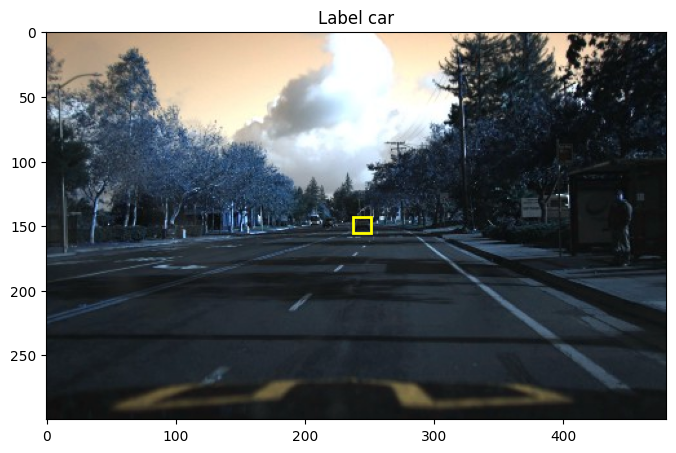

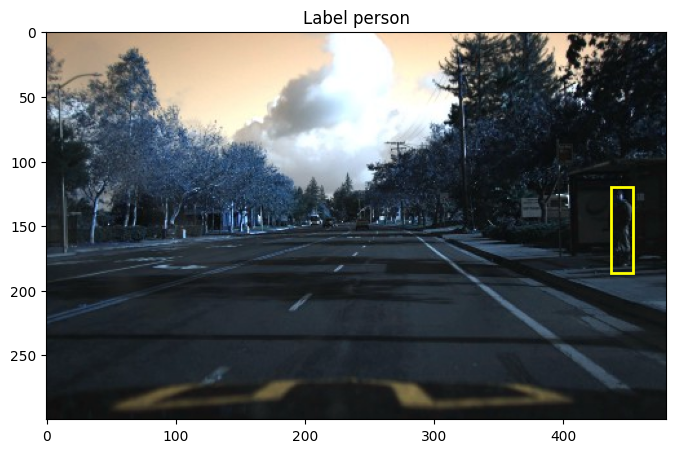

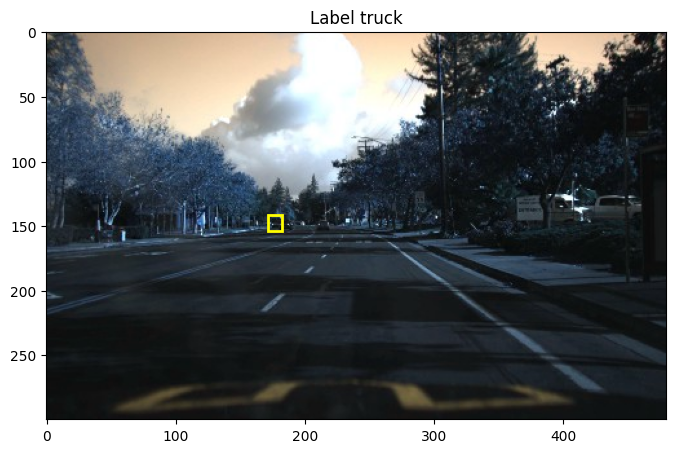

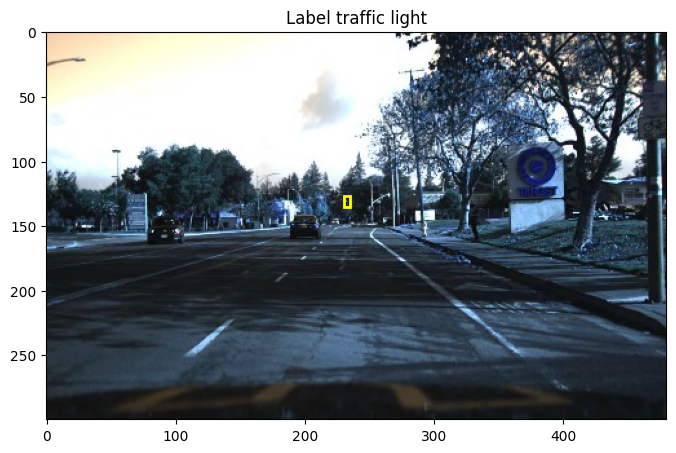

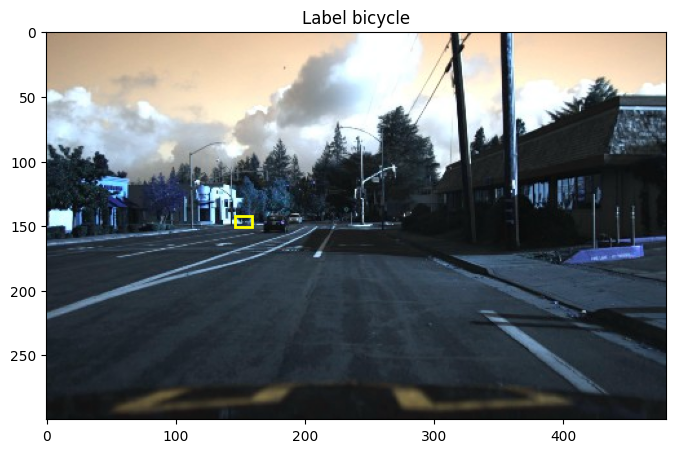

In [8]:
for i in classes:

    xmin, xmax, ymin, ymax = boxes[i][0], boxes[i][1], boxes[i][2], boxes[i][3]

    plt.figure(figsize=(8, 10))
    plt.title("Label " + labels[i])
    plt.imshow(images[i])
    plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color='yellow', fill=False, linewidth=2))

    plt.show()

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#9c7606; font-size:140%; text-align:left;padding: 10px; border-bottom: 2px solid #f79a05"> Model</p>

In [1]:
from ultralytics import YOLO
import PIL
from PIL import Image
from IPython.display import display
import os
import pathlib
print('ok')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/home/charly/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
ok


In [2]:
model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:05<00:00, 9.91MB/s]


In [3]:
#results=model.predict(source="/kaggle/input/self-driving-cars/images/1478019956680248165.jpg",save=True, conf=0.2,iou=0.5)
#results=model.predict(source= alincijov_self_driving_cars_path+'/images/'+'1478019956680248165.jpg',save=True, conf=0.2,iou=0.5)
results=model.predict(source='data/images/1478019956680248165.jpg',save=True, conf=0.2,iou=0.5)


image 1/1 /home/charly/dev/public/pixaquila/data/images/1478019956680248165.jpg: 416x640 1 car, 1 truck, 46.1ms
Speed: 3.9ms preprocess, 46.1ms inference, 115.0ms postprocess per image at shape (1, 3, 416, 640)
Results saved to /home/charly/dev/public/pixaquila/runs/detect/predict


In [4]:
result = results[0]
box = result.boxes[0]

In [5]:
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs  # Class probabilities for classification outputs

In [6]:
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: 2.0
Coordinates: [124.6908187866211, 142.68809509277344, 148.78184509277344, 162.09901428222656]
Probability: 0.7159396409988403


In [7]:
for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

Object type: car
Coordinates: [125, 143, 149, 162]
Probability: 0.72
---
Object type: truck
Coordinates: [141, 139, 157, 154]
Probability: 0.31
---


In [8]:
#results1 = model.predict(source=alincijov_self_driving_cars_path+'/images/'+'1479504451378975958.jpg', save=True, conf=0.2,iou=0.5)
results1 = model.predict(source='data/images/1479504451378975958.jpg', save=True, conf=0.2,iou=0.5)
Results = results1[0]


image 1/1 /home/charly/dev/public/pixaquila/data/images/1479504451378975958.jpg: 416x640 1 bicycle, 2 cars, 1 bus, 23.9ms
Speed: 11.1ms preprocess, 23.9ms inference, 6.5ms postprocess per image at shape (1, 3, 416, 640)
Results saved to /home/charly/dev/public/pixaquila/runs/detect/predict


In [10]:
import cv2

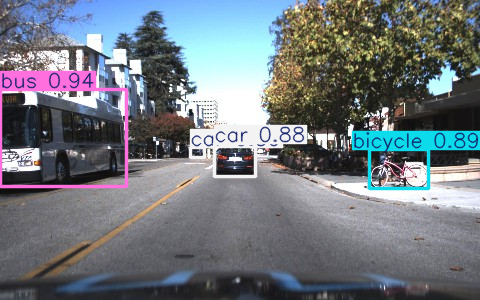

In [11]:
# Plotting results
plot = results1[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))